In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/4/delivery_time.csv")

In [6]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
#EDA

In [7]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_8482/1321865188.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

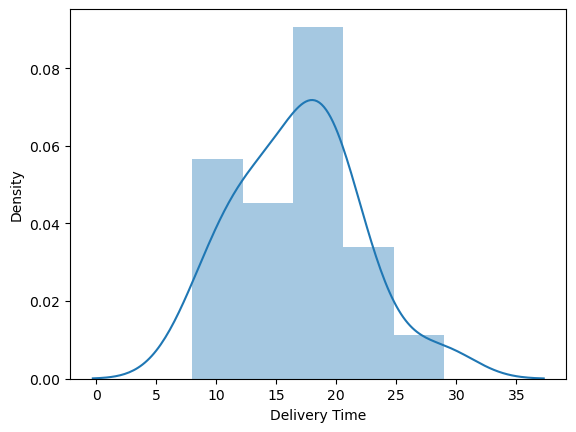

In [9]:
sns.distplot(data['Delivery Time'])


/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_8482/3932129489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

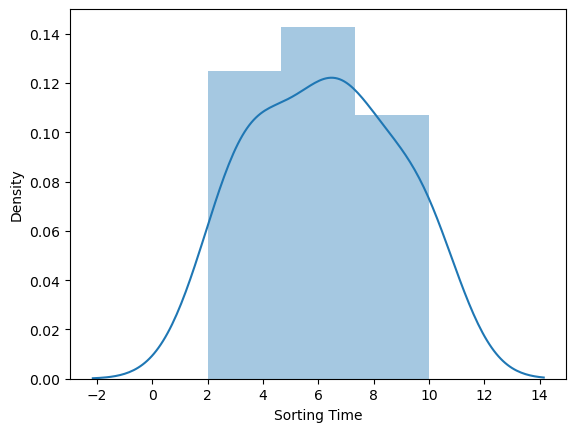

In [10]:
sns.distplot(data['Sorting Time'])

In [9]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
#correlation analysis
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

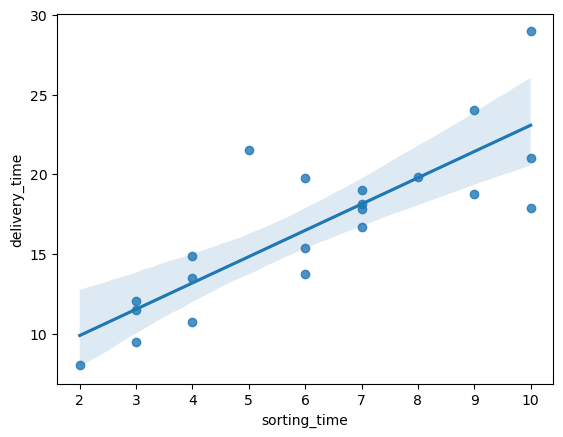

In [15]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [21]:
#MODEL BUILDING

In [10]:
X=pd.DataFrame(data['delivery_time'])
y=pd.DataFrame(data['sorting_time'])

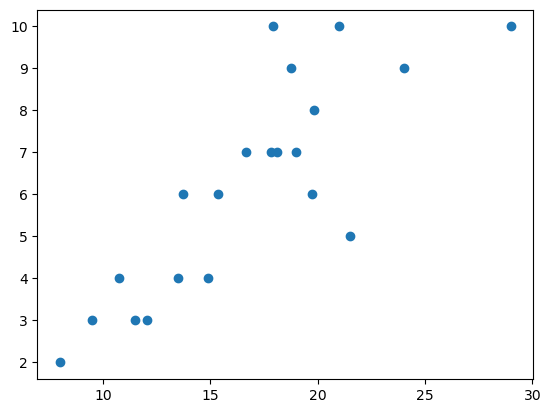

In [11]:
plt.scatter(X,y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14, 1)
(7, 1)
(14, 1)
(7, 1)


In [14]:
X_train

,delivery_time
1,13.50
9,18.75
17,18.11
12,16.68
5,15.35
2,19.75
4,29.00
14,12.03
10,19.83
16,13.75


In [15]:
#In scikit, ML algorithm take 2 D data, so we covert X_train to 2D
import numpy as np
X_train=np.array(X_train).reshape(-1,1)
X_train

array([[13.5 ],
       [18.75],
       [18.11],
       [16.68],
       [15.35],
       [19.75],
       [29.  ],
       [12.03],
       [19.83],
       [13.75],
       [14.88],
       [ 9.5 ],
       [24.  ],
       [17.9 ]])

In [16]:
X_test=np.array(X_test).reshape(-1,1)
X_test

array([[ 8.  ],
       [21.5 ],
       [10.75],
       [17.83],
       [11.5 ],
       [19.  ],
       [21.  ]])

In [27]:
#train the algorithm

In [17]:
from sklearn.linear_model import LinearRegression

#MODEL
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

In [20]:
c = lr.intercept_
c

array([-0.42040004])

In [22]:
m = lr.coef_
m

array([[0.40277168]])

In [25]:
#Y_pred_train = m*X_train + c
#Y_pred_train 
#OR

y_pred_train =lr.predict(X_train)
y_pred_train

array([[ 5.01701759],
       [ 7.1315689 ],
       [ 6.87379502],
       [ 6.29783153],
       [ 5.7621452 ],
       [ 7.53434057],
       [11.25997858],
       [ 4.42494323],
       [ 7.56656231],
       [ 5.11771051],
       [ 5.57284251],
       [ 3.40593089],
       [ 9.2461202 ],
       [ 6.78921297]])

Text(0, 0.5, 'sorting time')

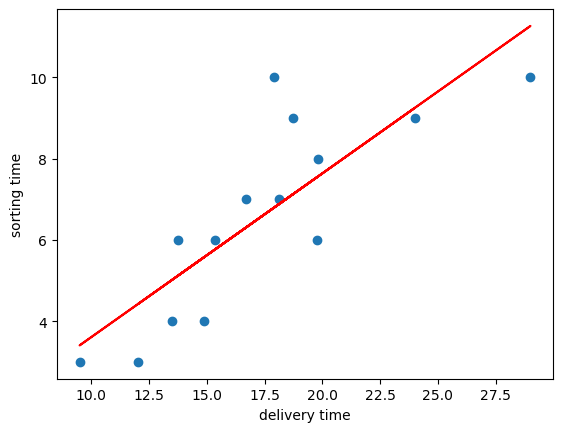

In [27]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train,color='red')
plt.xlabel("delivery time")
plt.ylabel("sorting time")

In [28]:
y_pred_test =lr.predict(X_test)
y_pred_test

array([[2.80177337],
       [8.23919101],
       [3.90939548],
       [6.76101895],
       [4.21147424],
       [7.23226182],
       [8.03780517]])

Text(0, 0.5, 'sorting time')

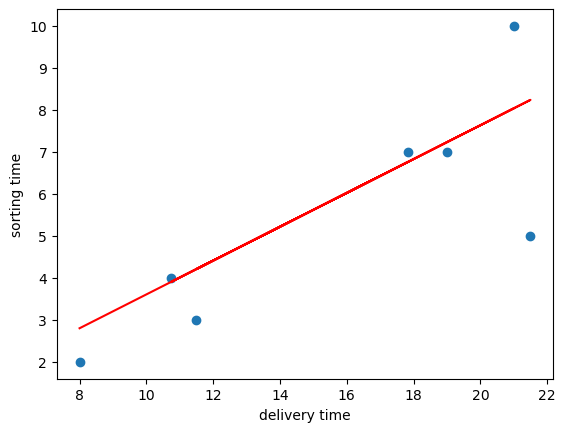

In [29]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,color='red')
plt.xlabel("delivery time")
plt.ylabel("sorting time")

In [31]:
# Evaluate the model

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.36747771128076
R-squared: 0.6374799754601337


In [32]:
# Apply logarithmic transformation to the dependent variable
y_log = np.log(y)


In [86]:
model = LinearRegression()
model.fit(X, y_log)



LinearRegression()

In [108]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [109]:
y_pred_log = model.predict(X)


In [110]:
r2 = r2_score(y_log, y_pred_log)
print("R-squared value:", r2)

R-squared value: 0.6954434611324223


In [111]:
c = model.intercept_
c

array([0.43723654])

In [112]:
m = model.coef_
m

array([[0.07690055]])

In [104]:
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_log_train.shape)
print(y_log_test.shape)

(14, 1)
(7, 1)
(14, 1)
(7, 1)


In [114]:
y_log_pred_test =model.predict(X_test)
y_log_pred_test

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.05244094],
       [2.09059835],
       [1.26391745],
       [1.80837333],
       [1.32159286],
       [1.89834698],
       [2.05214807]])

Text(0, 0.5, 'sorting time')

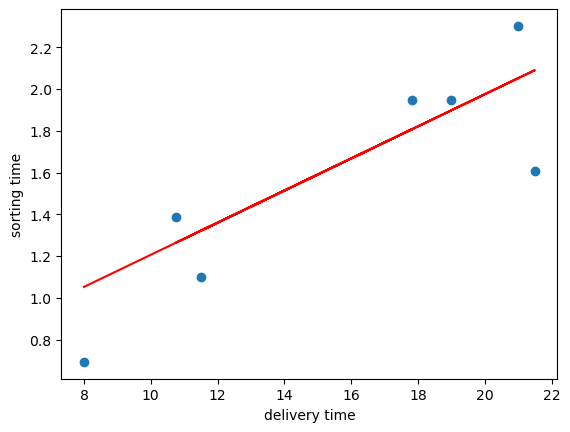

In [115]:
plt.scatter(X_test,y_log_test)
plt.plot(X_test,y_log_pred_test,color='red')
plt.xlabel("delivery time")
plt.ylabel("sorting time")

In [77]:
#square root transformation to the target variable:
y_transformed = np.sqrt(y)

In [118]:
model1 = LinearRegression()
model1.fit(X, y_transformed)

LinearRegression()

In [119]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [120]:
y_pred_transformed = model1.predict(X)

In [121]:
#Reverse the square root transformation for the predictions:
y_pred = np.square(y_pred_transformed)

In [122]:
r2 = r2_score(y_transformed, y_pred_transformed)
print("R-squared value:", r2)

R-squared value: 0.695806227630867


In [ ]:
#we are getting higher value indicating a better fit of the model to the data with square root transformation.

In [123]:
c = model1.intercept_
c

array([0.96093398])

In [124]:
m = model1.coef_
m

array([[0.08767067]])

In [125]:
_train, X_test, y_transformed_train, y_transformed_test = train_test_split(X, y_transformed, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [126]:
y_transformed_pred_test =model1.predict(X_test)
y_transformed_pred_test

array([[1.66229934],
       [2.84585338],
       [1.90339368],
       [2.52410203],
       [1.96914669],
       [2.62667671],
       [2.80201805]])

Text(0, 0.5, 'sorting time')

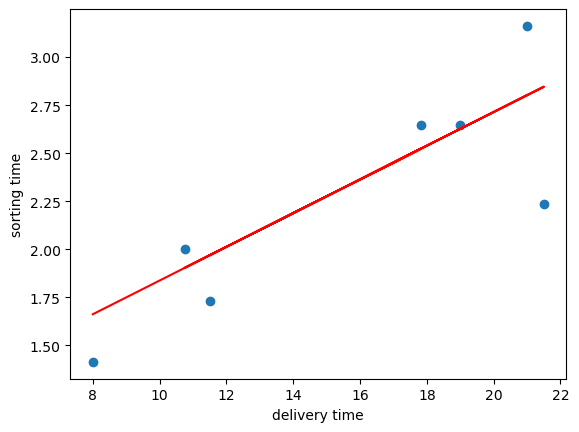

In [127]:
plt.scatter(X_test,y_transformed_test)
plt.plot(X_test,y_transformed_pred_test,color='red')
plt.xlabel("delivery time")
plt.ylabel("sorting time")

In [128]:
#Hence the final model is y=m*X+c 
#which is : y = array([[0.08767067]])*X + array([0.96093398])
#with R2 score of 69.58%